In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


In [3]:
import pandas as pd

df = pd.read_csv('/kaggle/input/zomato-bangalore-restaurants/zomato.csv')
print(df.head())

                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5  

In [4]:
print("Shape of original data: ",df.shape)

Shape of original data:  (51717, 17)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
print("Null Values : \n " ,df.isnull().sum())

Null Values : 
  url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [8]:
#Handle Null Values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [9]:
df['rate'] = df['rate'].replace('NEW', None)   #convert to none( as null to handle it , pandas)

In [10]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', None, '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
#convert str to float(col rate)

def convert_rate(x):
    try:
        return float(str(x).split('/')[0])
    except:
        return None

df['rate'] = df['rate'].apply(convert_rate) #al values: float , none

df['rate'] = df['rate'].fillna(df['rate'].mean()) #>> none


In [12]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [13]:
df['phone'].unique()

array(['080 42297555\r\n+91 9743772233', '080 41714161', '+91 9663487993',
       ..., '+91 9663517066\n+91 9686861135', '+91 9164562939',
       '080 65951222'], dtype=object)

In [14]:
df.drop(['phone' , 'address' , 'url'] , axis=1 ,inplace=True)
df.shape

(51717, 14)

In [15]:
df = df.dropna(subset=['location'])
df.shape #delete null in col location

(51696, 14)

In [16]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [17]:
print(df['rest_type'].mode()[0])
df.loc[:, 'rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])

Quick Bites


In [18]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [19]:
df.loc[:, 'dish_liked'] = df['dish_liked'].fillna('No Data')

In [20]:
df.loc[:, 'cuisines'] = df['cuisines'].fillna('Unknown')

In [21]:
# Convert text or mixed values to num and convert invalid values to nan
df.loc[:, 'approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# 2. nan >> median
median_cost = df['approx_cost(for two people)'].median()
df.loc[:, 'approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(median_cost)

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].infer_objects()


/tmp/ipykernel_36/3197128748.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(median_cost)


In [22]:
print("After Handling null values: " ,df.shape)

After Handling null values:  (51696, 14)


In [23]:
#Duplicated
df.duplicated().sum()

63

In [24]:
#handle duplicated
df = df.drop_duplicates().reset_index(drop=True)

In [25]:
print("After removing duplicated: " ,df.shape )

After removing duplicated:  (51633, 14)


In [26]:
df.drop('menu_item' , axis=1 , inplace =True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51633 entries, 0 to 51632
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51633 non-null  object 
 1   online_order                 51633 non-null  object 
 2   book_table                   51633 non-null  object 
 3   rate                         51633 non-null  float64
 4   votes                        51633 non-null  int64  
 5   location                     51633 non-null  object 
 6   rest_type                    51633 non-null  object 
 7   dish_liked                   51633 non-null  object 
 8   cuisines                     51633 non-null  object 
 9   approx_cost(for two people)  51633 non-null  float64
 10  reviews_list                 51633 non-null  object 
 11  listed_in(type)              51633 non-null  object 
 12  listed_in(city)              51633 non-null  object 
dtypes: float64(2), i

In [28]:
#reduce num of classes

In [29]:
df['location'].value_counts()

location
BTM                      5109
HSR                      2522
Koramangala 5th Block    2503
JP Nagar                 2234
Whitefield               2141
                         ... 
West Bangalore              6
Yelahanka                   6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [30]:
top_locations = df['location'].value_counts().head(10).index
print("Top locations: " , top_locations)

Top locations:  Index(['BTM', 'HSR', 'Koramangala 5th Block', 'JP Nagar', 'Whitefield',
       'Indiranagar', 'Jayanagar', 'Marathahalli', 'Bannerghatta Road',
       'Bellandur'],
      dtype='object', name='location')


In [31]:
df = df[df['location'].isin(top_locations)] #choose top , delete the rest
df.reset_index(drop=True, inplace=True)

df['location'].value_counts()

location
BTM                      5109
HSR                      2522
Koramangala 5th Block    2503
JP Nagar                 2234
Whitefield               2141
Indiranagar              2082
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1628
Bellandur                1283
Name: count, dtype: int64

In [32]:
df['rest_type'].unique()

array(['Casual Dining', 'Quick Bites', 'Dessert Parlor', 'Cafe',
       'Beverage Shop', 'Sweet Shop', 'Quick Bites, Dessert Parlor',
       'Pub, Casual Dining', 'Casual Dining, Bar',
       'Dessert Parlor, Beverage Shop', 'Beverage Shop, Quick Bites',
       'Takeaway, Delivery', 'Bakery', 'Microbrewery, Casual Dining',
       'Takeaway', 'Pub', 'Food Court', 'Cafe, Bakery',
       'Cafe, Casual Dining', 'Quick Bites, Cafe', 'Delivery',
       'Casual Dining, Cafe', 'Kiosk', 'Dhaba',
       'Beverage Shop, Dessert Parlor', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Sweet Shop, Quick Bites', 'Bakery, Quick Bites',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Cafe, Quick Bites', 'Mess',
       'Confectionery', 'Lounge', 'Lounge, Bar', 'Bar, Casual Dining',
       'Dessert Parlor, Quick Bites', 'Food Court, Dessert Parlor',
       'Casual Dining, Sweet Shop', 'Food Court, Casual Dining', 'Bar',
       'Fine Dining', '

In [33]:
df['rest_type'].value_counts()

rest_type
Quick Bites                  8835
Casual Dining                4794
Cafe                         1620
Delivery                     1186
Takeaway, Delivery           1148
                             ... 
Pop Up                          2
Dessert Parlor, Kiosk           2
Cafe, Food Court                2
Food Court, Beverage Shop       1
Bakery, Food Court              1
Name: count, Length: 72, dtype: int64

In [34]:
top_rest_types = df['rest_type'].value_counts().head(10).index

df['rest_type'] = df['rest_type'].apply(lambda x: x if x in top_rest_types else 'Other')

print(df['rest_type'].value_counts())

rest_type
Quick Bites           8835
Casual Dining         4794
Other                 2945
Cafe                  1620
Delivery              1186
Takeaway, Delivery    1148
Dessert Parlor        1054
Beverage Shop          479
Bakery                 463
Food Court             377
Casual Dining, Bar     373
Name: count, dtype: int64


In [35]:
df['name'].value_counts()

name
Empire Restaurant                                          37
Cafe Coffee Day                                            37
eat.fit                                                    37
Stoner                                                     31
Apsara Ice Cream                                           31
                                                           ..
Annapurna Benne Dose                                        1
Hotel Coorg Style                                           1
SLV Upahara                                                 1
Mr. Anbu's Ambur Biriyani                                   1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 4235, dtype: int64

In [36]:
top_names = df['name'].value_counts().head(100).index

df.loc[:, 'name'] = df['name'].apply(lambda x: x if x in top_names else 'Other')

df['name'].value_counts()

name
Other                20992
Empire Restaurant       37
eat.fit                 37
Cafe Coffee Day         37
Chai Point              31
                     ...  
Oye Amritsar            18
Food Theory             18
Truffles                18
Cafe 221B               18
On The Nose             18
Name: count, Length: 101, dtype: int64

In [37]:
df['cuisines'].value_counts()

cuisines
North Indian                            1403
North Indian, Chinese                   1201
South Indian                             628
Fast Food                                410
Bakery, Desserts                         381
                                        ... 
Fast Food, Biryani, Chinese                1
North Indian, Chinese, Oriya, Mithai       1
Beverages, Burger                          1
Desserts, Beverages, American              1
Arabian, Chinese, North Indian             1
Name: count, Length: 1600, dtype: int64

In [38]:
top_cuisines = df['cuisines'].value_counts()
common_cuisines = top_cuisines[top_cuisines > 200].index

df.loc[:, 'cuisines'] = df['cuisines'].apply(lambda x: x if x in common_cuisines else 'Other')

df['cuisines'].value_counts()

cuisines
Other                                  17173
North Indian                            1403
North Indian, Chinese                   1201
South Indian                             628
Fast Food                                410
Bakery, Desserts                         381
Biryani                                  358
South Indian, North Indian, Chinese      337
Desserts                                 274
Cafe                                     248
Bakery                                   235
Chinese                                  223
Chinese, North Indian                    202
Ice Cream, Desserts                      201
Name: count, dtype: int64

In [39]:
df['listed_in(type)'].value_counts()

listed_in(type)
Delivery              12731
Dine-out               7455
Desserts               1489
Cafes                   701
Drinks & nightlife      351
Buffet                  321
Pubs and bars           226
Name: count, dtype: int64

In [40]:
df['listed_in(city)'].value_counts()

listed_in(city)
BTM                      2597
Jayanagar                1950
JP Nagar                 1934
Koramangala 7th Block    1623
Bannerghatta Road        1574
Koramangala 5th Block    1571
Koramangala 4th Block    1451
Whitefield               1413
Koramangala 6th Block    1277
HSR                      1254
Marathahalli             1245
Brookefield              1113
Indiranagar               975
Bellandur                 855
Old Airport Road          668
Sarjapur Road             668
Basavanagudi              542
MG Road                   190
Banashankari              100
Brigade Road               88
Frazer Town                85
Church Street              67
Residency Road             16
Lavelle Road               12
Kammanahalli                4
Rajajinagar                 1
Kalyan Nagar                1
Name: count, dtype: int64

In [41]:
top_cities = df['listed_in(city)'].value_counts().head(15).index
df.loc[:, 'listed_in(city)'] = df['listed_in(city)'].apply(lambda x: x if x in top_cities else 'Other')

df['listed_in(city)'].value_counts()

listed_in(city)
BTM                      2597
Jayanagar                1950
JP Nagar                 1934
Other                    1774
Koramangala 7th Block    1623
Bannerghatta Road        1574
Koramangala 5th Block    1571
Koramangala 4th Block    1451
Whitefield               1413
Koramangala 6th Block    1277
HSR                      1254
Marathahalli             1245
Brookefield              1113
Indiranagar               975
Bellandur                 855
Old Airport Road          668
Name: count, dtype: int64

In [42]:
df['rate']

0        4.400000
1        4.000000
2        3.600000
3        4.400000
4        4.100000
           ...   
23269    3.700449
23270    2.500000
23271    3.600000
23272    3.700449
23273    3.700449
Name: rate, Length: 23274, dtype: float64

In [43]:
def simplify_rating(rate):
    if rate < 2.5:
        return 'Very Low'
    elif 2.5 <= rate < 3.5:
        return 'Low'
    elif 3.5 <= rate < 4.0:
        return 'Medium'
    elif 4.0 <= rate < 4.5:
        return 'High'
    else:
        return 'Very High'

df.loc[:, 'rate_category'] = df['rate'].apply(simplify_rating)
print(df['rate_category'].value_counts())


rate_category
Medium       12723
Low           5224
High          4586
Very High      642
Very Low        99
Name: count, dtype: int64


In [44]:
df['votes']

0        4884
1         618
2          34
3        4401
4         175
         ... 
23269       0
23270      81
23271      27
23272       0
23273       0
Name: votes, Length: 23274, dtype: int64

In [45]:
def simplify_votes(vote):
    if vote == 0:
        return 'No Votes'
    elif vote <= 20:
        return 'Low'
    elif vote <= 100:
        return 'Medium'
    elif vote <= 500:
        return 'High'
    else:
        return 'Very High'

df.loc[:, 'votes_category'] = df['votes'].apply(simplify_votes)
print(df['votes_category'].value_counts())


votes_category
Medium       5966
High         5136
Low          4529
No Votes     4517
Very High    3126
Name: count, dtype: int64


In [46]:
df['dish_liked'].value_counts()

dish_liked
No Data                                                                                              12706
Biryani                                                                                                 59
Chicken Biryani                                                                                         55
Paratha                                                                                                 43
Friendly Staff                                                                                          33
                                                                                                     ...  
Paneer Pizza, Oreo Shake, Onion Rings, Maggi, Peri Peri Chicken Pizza, Lamb Burger, Cheese Balls         1
Rice Bowl, Nachos, California Burrito, Rice Bowls, Chicken Quesadilla, Bbq Chicken, Pink Lemonade        1
Prawn, Dal Makhani, Fish, Shahi Tukda, Barfi, Pizza, Veg Mushroom                                        1
Paneer Tikka, Chilli Chick

In [47]:
dish_counts = df['dish_liked'].value_counts()
common_dishes = dish_counts[dish_counts > 20].index  

df.loc[:, 'dish_liked'] = df['dish_liked'].apply(lambda x: x if x in common_dishes else 'Other')

print(df['dish_liked'].value_counts())


dish_liked
No Data                                                                                       12706
Other                                                                                         10272
Biryani                                                                                          59
Chicken Biryani                                                                                  55
Paratha                                                                                          43
Friendly Staff                                                                                   33
Masala Dosa                                                                                      32
Coffee                                                                                           28
Waffles                                                                                          25
Burgers, Pasta, Chocolate Mousse, Potato Wedges, Cup Cake, Cheesy Fries, Peri Peri Chicke

In [48]:
df['approx_cost(for two people)'].value_counts()

approx_cost(for two people)
400.0    5907
300.0    3566
500.0    2371
200.0    2247
600.0    1798
250.0    1392
800.0    1108
700.0     847
350.0     791
150.0     766
450.0     560
900.0     399
100.0     372
650.0     342
550.0     338
750.0     310
850.0      68
950.0      34
120.0      11
230.0      10
130.0       8
80.0        6
180.0       5
330.0       4
40.0        4
70.0        3
50.0        2
190.0       2
240.0       2
560.0       1
Name: count, dtype: int64

In [49]:
print("Max cost:", df['approx_cost(for two people)'].max())

Max cost: 950.0


In [50]:

df['approx_cost(for two people)'] = df['approx_cost(for two people)']\
    .astype(str)\
    .str.replace(',', '')\
    .str.replace('₹', '')\
    .str.strip()

df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
df = df.dropna(subset=['approx_cost(for two people)'])

print("Max cost:", df['approx_cost(for two people)'].max())

bins = [0, 200, 400, 700, 1000, 1200]  # تأكدي إن 1200 > 950
labels = ['Very Cheap', 'Cheap', 'Moderate', 'Expensive', 'Very Expensive']

df.loc[:, 'cost_range'] = pd.cut(df['approx_cost(for two people)'], bins=bins, labels=labels, include_lowest=True)

print(df['cost_range'].value_counts())

Max cost: 950.0
cost_range
Cheap             11672
Moderate           6257
Very Cheap         3426
Expensive          1919
Very Expensive        0
Name: count, dtype: int64


In [51]:
df['reviews_list'].value_counts()

reviews_list
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [56]:
import re
import string

def clean_review(text):
    text = str(text).lower()  
    text = re.sub(r'[\n\r]', ' ', text)  #remove new lines
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  #remove links
    text = re.sub(r'<.*?>', '', text)  #remove html tags
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  #علامات الترقيم
    text = re.sub(r'\d+', '', text)  #remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  #space
    return text

df['clean_reviews'] = df['reviews_list'].fillna('').apply(clean_review)


In [57]:
df['clean_reviews'].nunique()

10377

In [58]:
import  re
import string

def clean_review(text):
    text = str(text).lower() 
    text = re.sub(r'[\n\r]', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_reviews'] = df['reviews_list'].fillna('').apply(clean_review)


In [59]:
review_counts = df['clean_reviews'].value_counts()

rare_reviews = review_counts[review_counts < 10].index

df['clean_reviews'] = df['clean_reviews'].apply(lambda x: 'other' if x in rare_reviews else x)

print(df['clean_reviews'].nunique())


144


In [60]:
#encoding

In [61]:
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])

In [63]:
df = pd.get_dummies(df, columns=['rest_type', 'listed_in(type)', 'listed_in(city)'], drop_first=True)

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['cuisines'] = le.fit_transform(df['cuisines'])

In [66]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns: " ,numeric_columns)
print(f"Num of Numeric Columns: {len(numeric_columns)}")

cat_columns = df.select_dtypes(include='object').columns
print("Categorical Columns: " ,cat_columns)
print(f"Num of Categorical Columns: {len(cat_columns)}")

Numeric Columns:  Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'cuisines',
       'approx_cost(for two people)'],
      dtype='object')
Num of Numeric Columns: 7
Categorical Columns:  Index(['name', 'dish_liked', 'reviews_list', 'rate_category', 'votes_category',
       'clean_reviews'],
      dtype='object')
Num of Categorical Columns: 6


In [67]:
print(df['dish_liked'].dtype)
print(df['reviews_list'].dtype)
print(df['name'].dtype)

object
object
object


In [68]:
#name
le_name = LabelEncoder()
df['name'] = le_name.fit_transform(df['name'])

print(df['name'].dtype)

int64


In [69]:
#reviews list

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

X_reviews= vectorizer.fit_transform(df['clean_reviews'])

import pandas as pd
X_reviews_df = pd.DataFrame(X_reviews.toarray(), columns=vectorizer.get_feature_names_out())


In [70]:
print(df['clean_reviews'].dtype)
print("Type after appling TfidfVectorize: " , type(X_reviews))  # نوع الناتج قبل التحويل إلى DataFrame


object
Type after appling TfidfVectorize:  <class 'scipy.sparse._csr.csr_matrix'>


In [71]:
print(type(X_reviews_df)) 
print(X_reviews_df.dtypes.head()) 

<class 'pandas.core.frame.DataFrame'>
able          float64
absolutely    float64
according     float64
actually      float64
add           float64
dtype: object


In [72]:
#drop reviews list
df.drop('reviews_list' , axis=1 , inplace=True)

In [73]:
#dish liked

dish_counts = df['dish_liked'].value_counts()
common_dishes = dish_counts[dish_counts > 20].index  

df.loc[:, 'dish_liked'] = df['dish_liked'].apply(lambda x: x if x in common_dishes else 'Other')

df['dish_liked'] = df['dish_liked'].fillna('')

#TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')  
X_dishes = vectorizer.fit_transform(df['dish_liked'])

#  DataFrame
X_dishes_df = pd.DataFrame(X_dishes.toarray(), columns=vectorizer.get_feature_names_out())

print(X_dishes_df.shape)
print(X_dishes_df.head())

(23274, 21)
   biryani  burgers  cake  cheesy  chicken  chocolate  coffee  cup  data  \
0      0.0      0.0   0.0     0.0      0.0        0.0     0.0  0.0   0.0   
1      0.0      0.0   0.0     0.0      0.0        0.0     0.0  0.0   0.0   
2      0.0      0.0   0.0     0.0      0.0        0.0     0.0  0.0   1.0   
3      0.0      0.0   0.0     0.0      0.0        0.0     0.0  0.0   0.0   
4      0.0      0.0   0.0     0.0      0.0        0.0     0.0  0.0   0.0   

   dosa  ...  fries  masala  mousse  paratha  pasta  peri  potato  staff  \
0   0.0  ...    0.0     0.0     0.0      0.0    0.0   0.0     0.0    0.0   
1   0.0  ...    0.0     0.0     0.0      0.0    0.0   0.0     0.0    0.0   
2   0.0  ...    0.0     0.0     0.0      0.0    0.0   0.0     0.0    0.0   
3   0.0  ...    0.0     0.0     0.0      0.0    0.0   0.0     0.0    0.0   
4   0.0  ...    0.0     0.0     0.0      0.0    0.0   0.0     0.0    0.0   

   waffles  wedges  
0      0.0     0.0  
1      0.0     0.0  
2      0.0 

In [74]:
print(type(X_dishes))


<class 'scipy.sparse._csr.csr_matrix'>


In [75]:
print(X_dishes_df.dtypes.head())

biryani    float64
burgers    float64
cake       float64
cheesy     float64
chicken    float64
dtype: object


In [76]:
print(type(X_dishes_df))

<class 'pandas.core.frame.DataFrame'>


In [77]:
#drop dish_list
df.drop('dish_liked' , axis=1 , inplace=True)

In [78]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Columns:  \n" ,numeric_columns)
print(f"Num of Numeric Columns: {len(numeric_columns)}")

cat_columns = df.select_dtypes(include='object').columns
print("\n Categorical Columns: " ,cat_columns)
print(f"Num of Categorical Columns: {len(cat_columns)}")

Numeric Columns:  
 Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'cuisines', 'approx_cost(for two people)'],
      dtype='object')
Num of Numeric Columns: 8

 Categorical Columns:  Index(['rate_category', 'votes_category', 'clean_reviews'], dtype='object')
Num of Categorical Columns: 3


In [79]:
df['rate_category']

0          High
1          High
2        Medium
3          High
4          High
          ...  
23269    Medium
23270       Low
23271    Medium
23272    Medium
23273    Medium
Name: rate_category, Length: 23274, dtype: object

In [80]:
rating_order = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}

df['rate_category'] = df['rate_category'].map(rating_order)

In [81]:
print(df['rate_category'].dtype)

int64


In [82]:
cat_columns = df.select_dtypes(include='object').columns
print("\n Categorical Columns: " ,cat_columns)
print(f"Num of Categorical Columns: {len(cat_columns)}")


 Categorical Columns:  Index(['votes_category', 'clean_reviews'], dtype='object')
Num of Categorical Columns: 2


In [83]:
df['votes_category'].value_counts()

votes_category
Medium       5966
High         5136
Low          4529
No Votes     4517
Very High    3126
Name: count, dtype: int64

In [84]:
def simplify_votes(v):
    if v in ['Very High', 'High']:
        return 'High'
    elif v == 'Medium':
        return 'Medium'
    else:
        return 'Low'

df['votes_category'] = df['votes_category'].apply(simplify_votes)

print(df['votes_category'].value_counts())


votes_category
Low       9046
High      8262
Medium    5966
Name: count, dtype: int64


In [85]:
# One-Hot Encoding for votes_category
encoded_votes = pd.get_dummies(df['votes_category'], prefix='votes')
df = pd.concat([df, encoded_votes], axis=1)

# احذفي العمود الأصلي لو خلاص خلصتي منه
df.drop('votes_category', axis=1, inplace=True)


In [86]:
df['clean_reviews']

0        other
1        other
2        other
3        other
4        other
         ...  
23269    other
23270    other
23271    other
23272         
23273         
Name: clean_reviews, Length: 23274, dtype: object

In [87]:
df['clean_reviews'].value_counts()

clean_reviews
other                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [88]:
df['clean_reviews'] = df['clean_reviews'].fillna('other').astype(str)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')  # تقدري تغيّري max_features
X_reviews = vectorizer.fit_transform(df['clean_reviews'])

X_reviews_df = pd.DataFrame(X_reviews.toarray(), columns=vectorizer.get_feature_names_out())

df = pd.concat([df.reset_index(drop=True), X_reviews_df.reset_index(drop=True)], axis=1)

df.drop('clean_reviews', axis=1, inplace=True)


In [89]:
cat_columns = df.select_dtypes(include='object').columns
print("\n Categorical Columns: " ,cat_columns)
print(f"Num of Categorical Columns: {len(cat_columns)}")


 Categorical Columns:  Index([], dtype='object')
Num of Categorical Columns: 0


In [90]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
               ..
youre           0
yum             0
yummy           0
zomato          0
zucchini        0
Length: 1044, dtype: int64

In [91]:
df.duplicated().sum()

1260

In [92]:
df.drop_duplicates(inplace=True)

print("Number of rows after deletion: ", df.shape[0])
print("Remaining duplicate rows: ", df.duplicated().sum())


Number of rows after deletion:  22014
Remaining duplicate rows:  0


In [93]:
print(df.columns.duplicated().any())

True


In [94]:
# !!!!!!!!
duplicated_columns = df.columns[df.columns.duplicated()]
print("Duplicated columns:", duplicated_columns.tolist())

Duplicated columns: ['location', 'rate']


In [95]:
df = df.loc[:, ~df.columns.duplicated()]

In [96]:
print(df.columns.duplicated().any())

False


In [97]:
df['cost_range'].value_counts()

cost_range
Cheap             10922
Moderate           6084
Very Cheap         3113
Expensive          1895
Very Expensive        0
Name: count, dtype: int64

In [98]:
print(df[df['cost_range'] == 'Very Expensive'])

Empty DataFrame
Columns: [name, online_order, book_table, rate, votes, location, cuisines, approx_cost(for two people), rate_category, cost_range, rest_type_Beverage Shop, rest_type_Cafe, rest_type_Casual Dining, rest_type_Casual Dining, Bar, rest_type_Delivery, rest_type_Dessert Parlor, rest_type_Food Court, rest_type_Other, rest_type_Quick Bites, rest_type_Takeaway, Delivery, listed_in(type)_Cafes, listed_in(type)_Delivery, listed_in(type)_Desserts, listed_in(type)_Dine-out, listed_in(type)_Drinks & nightlife, listed_in(type)_Pubs and bars, listed_in(city)_Bannerghatta Road, listed_in(city)_Bellandur, listed_in(city)_Brookefield, listed_in(city)_HSR, listed_in(city)_Indiranagar, listed_in(city)_JP Nagar, listed_in(city)_Jayanagar, listed_in(city)_Koramangala 4th Block, listed_in(city)_Koramangala 5th Block, listed_in(city)_Koramangala 6th Block, listed_in(city)_Koramangala 7th Block, listed_in(city)_Marathahalli, listed_in(city)_Old Airport Road, listed_in(city)_Other, listed_in(city

In [99]:

df['cost_range'] = df['cost_range'].cat.remove_unused_categories()

In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['cost_range_encoded'] = le.fit_transform(df['cost_range'])

In [101]:
print(df['cost_range'].dtype)

category


In [102]:
print(df['cost_range_encoded'].dtype)

int64


In [103]:
df['cost_range_encoded'].unique()

array([1, 3, 2, 0])

In [105]:
df.drop('cost_range', axis=1 , inplace=True)

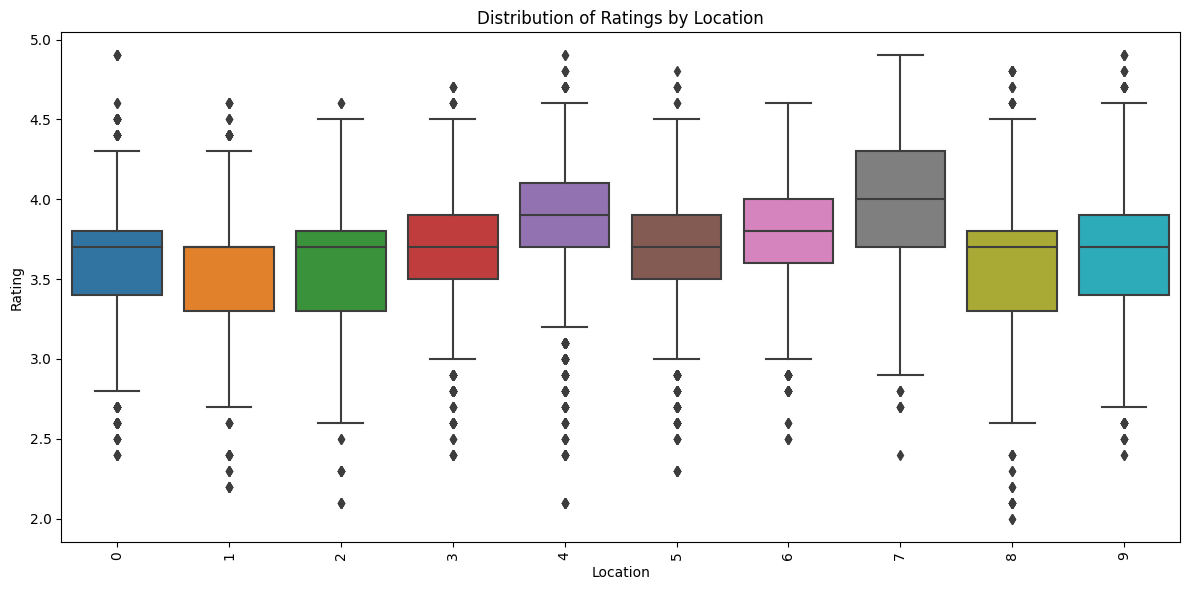

In [106]:
#1.  Does the demography of an area matter?

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='location', y='rate')
plt.xticks(rotation=90)
plt.title('Distribution of Ratings by Location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


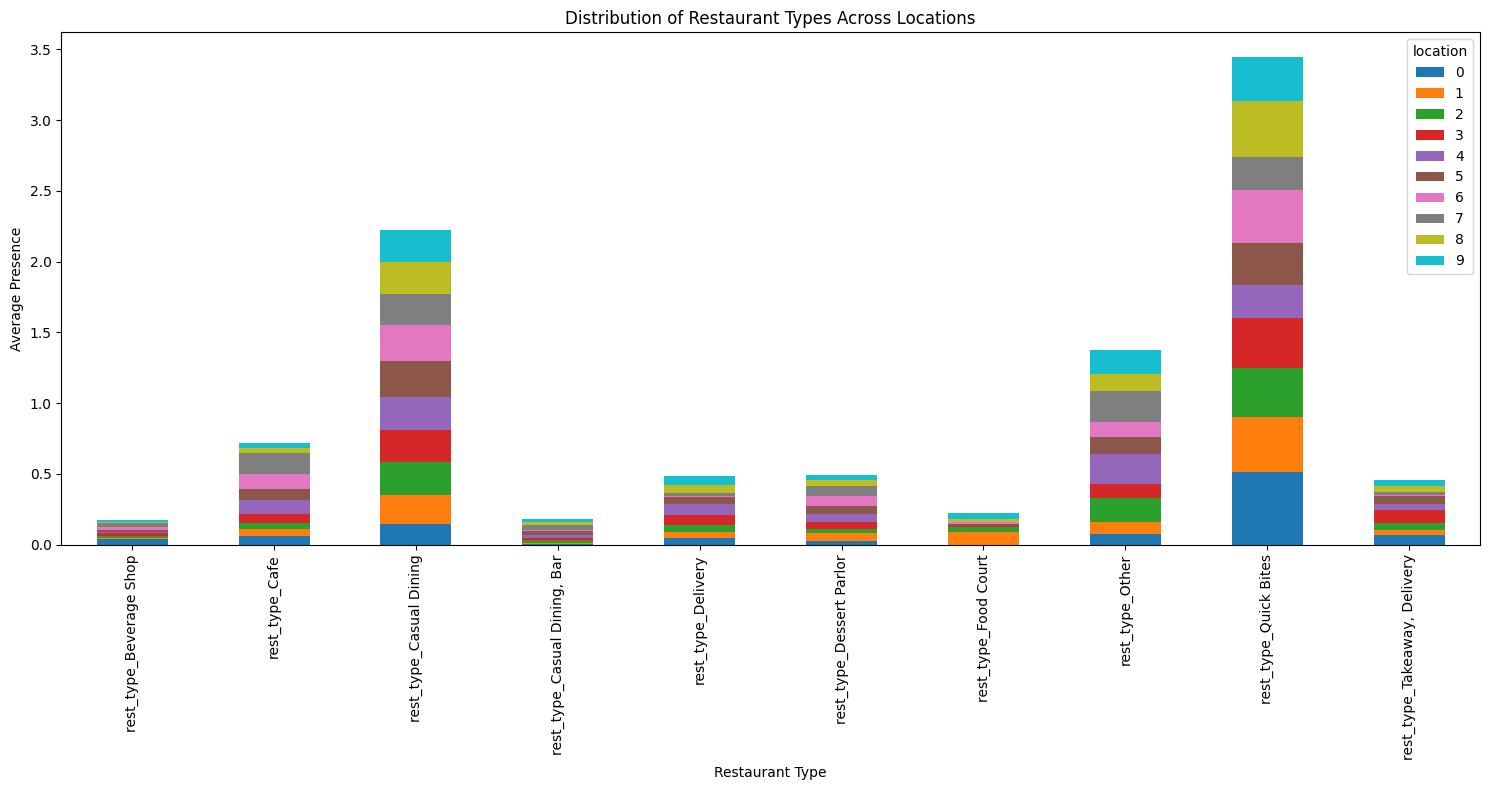

In [107]:
#2. Does the location of a particular type of restaurant depend on the people living in that area?
rest_type_columns = [col for col in df.columns if col.startswith('rest_type_')]

location_group = df.groupby('location')[rest_type_columns].mean()

location_group.T.plot(kind='bar', stacked=True, figsize=(15,8))
plt.title('Distribution of Restaurant Types Across Locations')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Presence')
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/534014681.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  theme_avg_rate = df[theme_cols + ['rate']].groupby(lambda col: col if col == 'rate' else None, axis=1).mean()


rest_type_Beverage Shop: 3.65
rest_type_Cafe: 3.83
rest_type_Casual Dining: 3.73
rest_type_Casual Dining, Bar: 4.14
rest_type_Delivery: 3.58
rest_type_Dessert Parlor: 3.87
rest_type_Food Court: 3.49
rest_type_Other: 3.86
rest_type_Quick Bites: 3.57
rest_type_Takeaway, Delivery: 3.56
rest_type_Beverage Shop: Average Rating = 3.65
rest_type_Cafe: Average Rating = 3.83
rest_type_Casual Dining: Average Rating = 3.73
rest_type_Casual Dining, Bar: Average Rating = 4.14
rest_type_Delivery: Average Rating = 3.58
rest_type_Dessert Parlor: Average Rating = 3.87
rest_type_Food Court: Average Rating = 3.49
rest_type_Other: Average Rating = 3.86
rest_type_Quick Bites: Average Rating = 3.57
rest_type_Takeaway, Delivery: Average Rating = 3.56


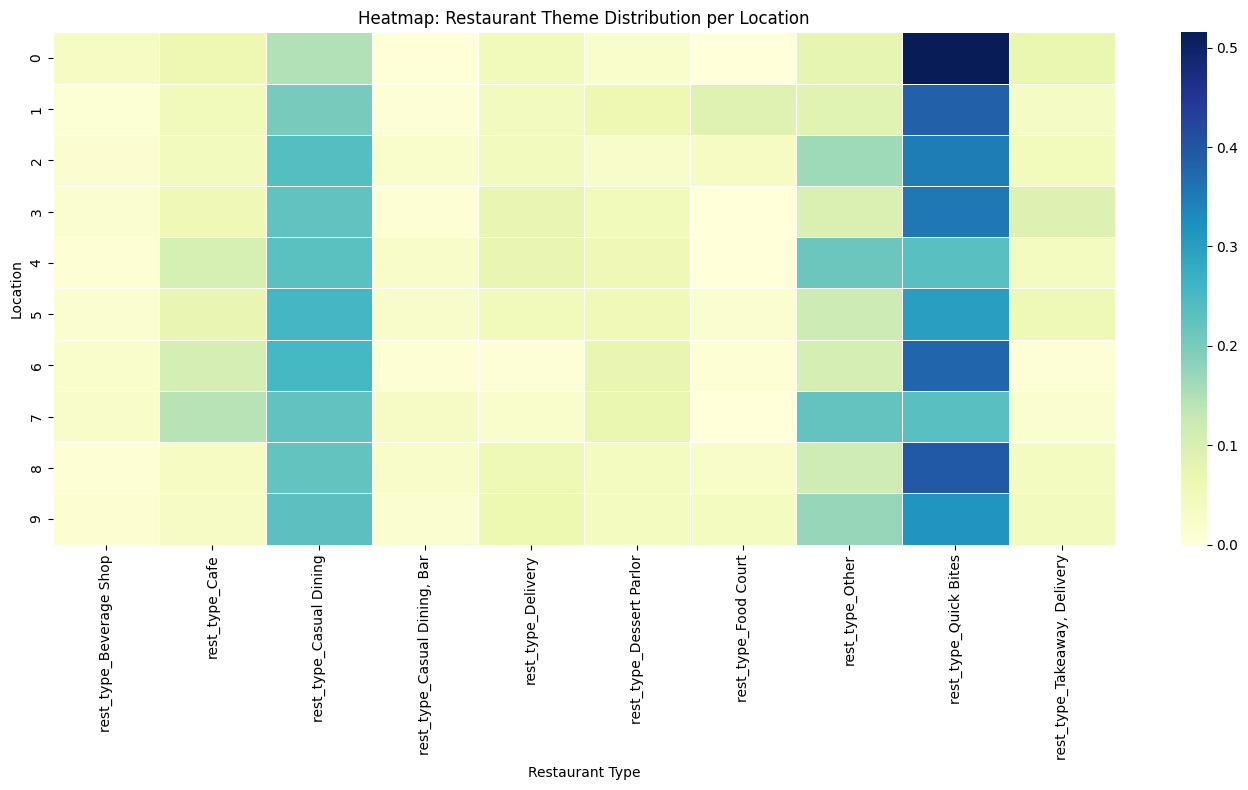

In [108]:
#3. Does the theme of the restaurant matter?

theme_cols = [col for col in df.columns if col.startswith('rest_type_')]

theme_avg_rate = df[theme_cols + ['rate']].groupby(lambda col: col if col == 'rate' else None, axis=1).mean()

for col in theme_cols:
    print(f"{col}: {df[df[col]==True]['rate'].mean():.2f}")


rest_type_cols = [col for col in df.columns if col.startswith('rest_type_')]

for col in rest_type_cols:
    mean_rating = df[df[col]==1]['rate'].mean()
    print(f"{col}: Average Rating = {round(mean_rating, 2)}")


#visualize
import matplotlib.pyplot as plt
import seaborn as sns

# تحديد أعمدة أنواع المطاعم
rest_type_cols = [col for col in df.columns if col.startswith('rest_type_')]

# حساب نسبة كل نوع مطعم في كل location
location_resttype = df.groupby('location')[rest_type_cols].mean()

# رسم heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(location_resttype, cmap='YlGnBu', linewidths=0.5)
plt.title('Heatmap: Restaurant Theme Distribution per Location')
plt.xlabel('Restaurant Type')
plt.ylabel('Location')
plt.tight_layout()
import os
os.makedirs("images", exist_ok=True) 

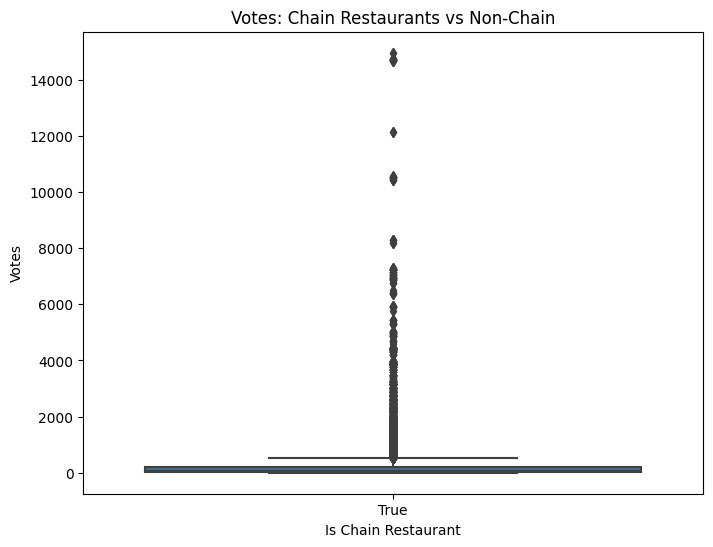

In [109]:
#4.  Is a food chain category restaurant likely to have more customers than its counterpart?


# Count the number of times each restaurant's name is repeated
name_counts = df['name'].value_counts()

# Create a new column: True if the restaurant name is repeated >> String
df['is_chain'] = df['name'].map(name_counts) > 1

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_chain', y='votes')
plt.title('Votes: Chain Restaurants vs Non-Chain')
plt.xlabel('Is Chain Restaurant')
plt.ylabel('Votes')
plt.show()

#if votes of chain :high >> This is an indicator that people tend to go to familiar restaurants

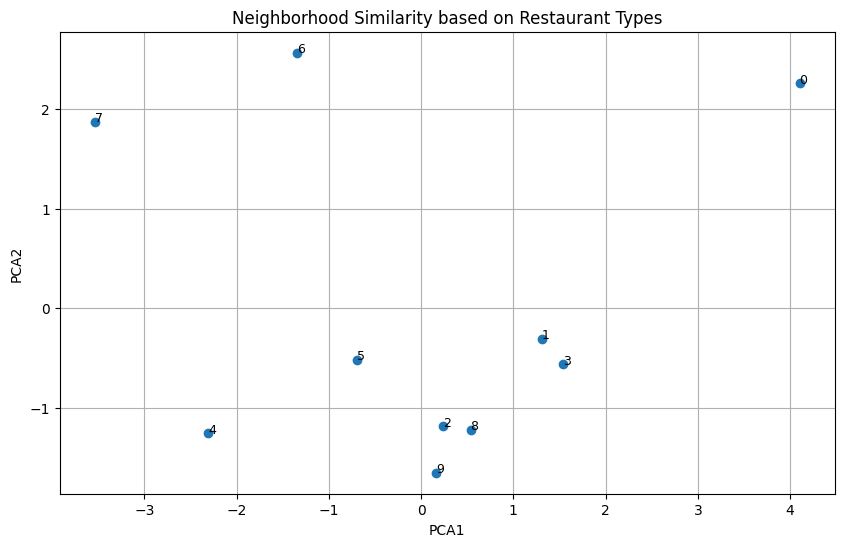

In [110]:
#5. Are any neighborhoods similar? 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# فقط أعمدة rest_type علشان نقارن
scaled = StandardScaler().fit_transform(location_resttype)

pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

plt.figure(figsize=(10,6))
plt.scatter(components[:,0], components[:,1])

for i, loc in enumerate(location_resttype.index):
    plt.text(components[i,0], components[i,1], loc, fontsize=9)

plt.title('Neighborhood Similarity based on Restaurant Types')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid()
plt.savefig("neighborhood_similarity_pca.png")
plt.show()


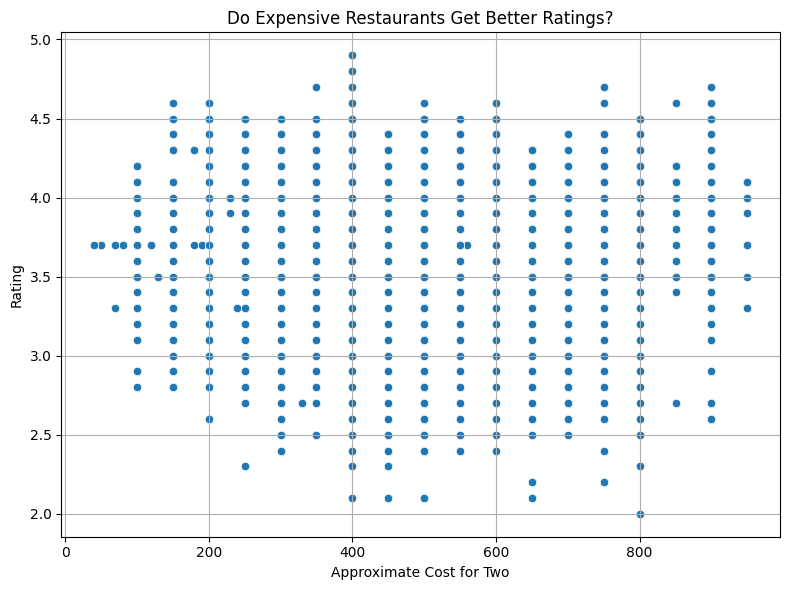

In [111]:
#6. Do expensive restaurants get better ratings?

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='approx_cost(for two people)', y='rate')
plt.title('Do Expensive Restaurants Get Better Ratings?')
plt.xlabel('Approximate Cost for Two')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


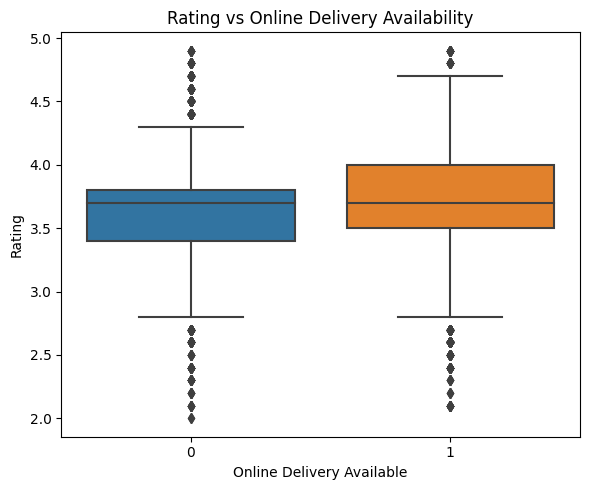

In [112]:
#7. Does online delivery availability affect the restaurant’s rating?

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='online_order', y='rate')
plt.title('Rating vs Online Delivery Availability')
plt.xlabel('Online Delivery Available')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

In [114]:
from sklearn.model_selection import train_test_split
X = df.drop(['rate_category' ], axis=1)
y = df['rate_category']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [115]:
xtrain.shape

(17611, 1042)

In [116]:
print(type(xtest))
print(xtest.shape)

<class 'pandas.core.frame.DataFrame'>
(4403, 1042)


In [117]:
df['rate_category'].value_counts()

rate_category
2    11579
1     5173
3     4527
4      638
0       97
Name: count, dtype: int64

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.transform(xtest)



In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model_log= LogisticRegression(max_iter=1000)
model_log.fit(X_train_scaled, ytrain)

y_pred_log = model_log.predict(X_test_scaled)


In [120]:

print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_log))

print("\nClassification Report:")
print(classification_report(ytest, y_pred_log))

print("\nAccuracy Score of logistic: ")
print(accuracy_score(ytest, y_pred_log))


Confusion Matrix:
[[   8    9    0    0    0]
 [   1 1018    1    0    0]
 [   0    0 2270    0    0]
 [   0    0    0  936    0]
 [   0    0    0    9  151]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.47      0.62        17
           1       0.99      1.00      0.99      1020
           2       1.00      1.00      1.00      2270
           3       0.99      1.00      1.00       936
           4       1.00      0.94      0.97       160

    accuracy                           1.00      4403
   macro avg       0.97      0.88      0.92      4403
weighted avg       1.00      1.00      1.00      4403


Accuracy Score of logistic: 
0.9954576425164661


In [121]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# إنشاء وتدريب نموذج SVC
svc_model = SVC(kernel='rbf', C=1, gamma='scale' , class_weight='balanced') 
svc_model.fit(X_train_scaled, ytrain)

SVC(C=1, class_weight='balanced')

In [122]:
y_pred_svc = svc_model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_svc))

print("\nClassification Report:")
print(classification_report(ytest, y_pred_svc , zero_division=0))

print("\nAccuracy Score of SVC: ")
print(accuracy_score(ytest, y_pred_svc ))


Confusion Matrix:
[[  17    0    0    0    0]
 [  30  978   12    0    0]
 [   0    8 1948  314    0]
 [   0    0   48  792   96]
 [   0    0    0    3  157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.36      1.00      0.53        17
           1       0.99      0.96      0.98      1020
           2       0.97      0.86      0.91      2270
           3       0.71      0.85      0.77       936
           4       0.62      0.98      0.76       160

    accuracy                           0.88      4403
   macro avg       0.73      0.93      0.79      4403
weighted avg       0.91      0.88      0.89      4403


Accuracy Score of SVC: 
0.8839427662957074


In [126]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model_nb = GaussianNB()
model_nb.fit(X_train_scaled, ytrain)

y_pred_nb = model_nb.predict(X_test_scaled)


In [127]:
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_nb))

print("\nClassification Report:")
print(classification_report(ytest, y_pred_nb ))

print("\nAccuracy Score of GaussianNB: ")
print(accuracy_score(ytest, y_pred_nb ))

Confusion Matrix:
[[ 17   0   0   0   0]
 [371  85   1 504  59]
 [777   7 214 962 310]
 [203   0   0  44 689]
 [  2   0   0   0 158]]

Classification Report:
              precision    recall  f1-score   support

           0       0.01      1.00      0.02        17
           1       0.92      0.08      0.15      1020
           2       1.00      0.09      0.17      2270
           3       0.03      0.05      0.04       936
           4       0.13      0.99      0.23       160

    accuracy                           0.12      4403
   macro avg       0.42      0.44      0.12      4403
weighted avg       0.74      0.12      0.14      4403


Accuracy Score of GaussianNB: 
0.11764705882352941


In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, ytrain)

y_pred_rf = rf.predict(X_test_scaled)

In [129]:
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_rf))

print("\nClassification Report:")
print(classification_report(ytest, y_pred_rf ))

print("\nAccuracy Score of SVC: ")
print(accuracy_score(ytest, y_pred_rf ))

Confusion Matrix:
[[  12    4    1    0    0]
 [   0 1011    9    0    0]
 [   0    0 2269    1    0]
 [   0    0   17  919    0]
 [   0    0    0   19  141]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        17
           1       1.00      0.99      0.99      1020
           2       0.99      1.00      0.99      2270
           3       0.98      0.98      0.98       936
           4       1.00      0.88      0.94       160

    accuracy                           0.99      4403
   macro avg       0.99      0.91      0.95      4403
weighted avg       0.99      0.99      0.99      4403


Accuracy Score of SVC: 
0.9884169884169884


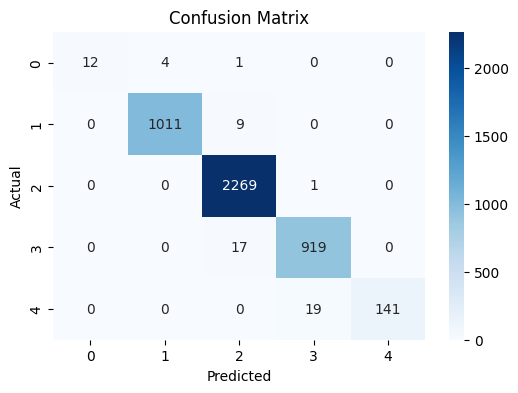

In [130]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [131]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, ytrain)

y_pred_knn = knn.predict(X_test_scaled)

In [132]:
print("Confusion Matrix:")
print(confusion_matrix(ytest, y_pred_knn))

print("\nClassification Report:")
print(classification_report(ytest, y_pred_knn ))

print("\nAccuracy Score of SVC: ")
print(accuracy_score(ytest, y_pred_knn ))

Confusion Matrix:
[[   2   15    0    0    0]
 [   0  641  371    8    0]
 [   0  134 1955  180    1]
 [   0    3  295  632    6]
 [   0    0    9  101   50]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        17
           1       0.81      0.63      0.71      1020
           2       0.74      0.86      0.80      2270
           3       0.69      0.68      0.68       936
           4       0.88      0.31      0.46       160

    accuracy                           0.74      4403
   macro avg       0.82      0.52      0.57      4403
weighted avg       0.75      0.74      0.74      4403


Accuracy Score of SVC: 
0.7449466272995685


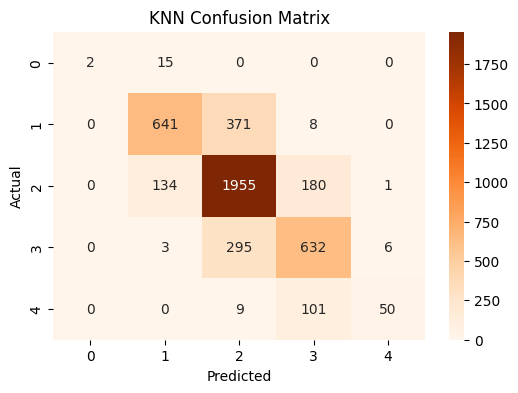

In [133]:

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(ytest, y_pred_knn), annot=True, fmt='d', cmap='Oranges')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [134]:
results = {
    'KNN': accuracy_score(ytest, y_pred_knn),
    'Logistic Reggression': accuracy_score(ytest, y_pred_log),
    'Random Forest': accuracy_score(ytest, y_pred_rf),
    'Naive Bayes' : accuracy_score(ytest , y_pred_rf),
    'SVC': accuracy_score(ytest, y_pred_svc),
    #'GradientBoost': accuracy_score(ytest, y_pred_gb),
     #'Decision Tree': accuracy_score(ytest, y_pred_tree),
    
}

sorted_results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))

# Show results
for model, acc in sorted_results.items():
    print(f'{model}: {acc:.2f}')


Logistic Reggression: 1.00
Random Forest: 0.99
Naive Bayes: 0.99
SVC: 0.88
KNN: 0.74


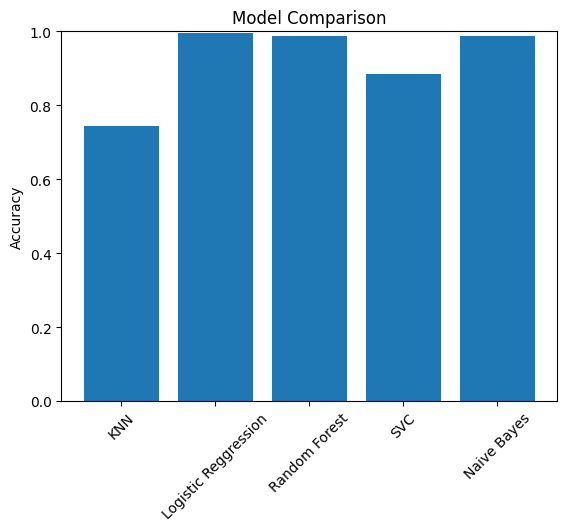

In [135]:
models = {
    'KNN': accuracy_score(ytest, y_pred_knn),
    'Logistic Reggression': accuracy_score(ytest, y_pred_log),
    'Random Forest': accuracy_score(ytest, y_pred_rf),
    'SVC': accuracy_score(ytest, y_pred_svc),
    'Naive Bayes' : accuracy_score(ytest , y_pred_rf),
    #'GradientBoost': accuracy_score(ytest, y_pred_gb),
    #'Decision Tree': accuracy_score(ytest, y_pred_tree),
}

plt.bar(models.keys(), models.values(), color='#1f77b4')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

In [136]:
df['rate_category'].value_counts()

rate_category
2    11579
1     5173
3     4527
4      638
0       97
Name: count, dtype: int64

In [140]:
#nn
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout

# بناء النموذج
nn_model = Sequential()
nn_model.add(Dense(128 , activation='relu' , input_shape=(X_train_scaled.shape[1],)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64 , activation='tanh'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32 , activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32 , activation='tanh'))

nn_model.add(Dense(5, activation='softmax'))

# Compile النموذج
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [141]:
history = nn_model.fit(X_train_scaled, ytrain, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6901 - loss: 0.7394 - val_accuracy: 0.9373 - val_loss: 0.1758
Epoch 2/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9044 - loss: 0.2482 - val_accuracy: 0.9759 - val_loss: 0.1024
Epoch 3/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9332 - loss: 0.1775 - val_accuracy: 0.9708 - val_loss: 0.0869
Epoch 4/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9404 - loss: 0.1535 - val_accuracy: 0.9716 - val_loss: 0.0864
Epoch 5/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9512 - loss: 0.1321 - val_accuracy: 0.9699 - val_loss: 0.0872
Epoch 6/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9587 - loss: 0.1166 - val_accuracy: 0.9813 - val_loss: 0.0573
Epoch 7/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9674 - loss: 0.0948 - val_accuracy: 0.9858 - val_loss: 0.0462
Epoch 8/10
441/441 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9681 - loss: 0.0946 - val_accuracy: 0.

In [144]:
loss, accuracy = nn_model.evaluate(X_test_scaled, ytest)
print(f"Test Accuracy: {accuracy*100:.2f}%")

138/138 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.0359
Test Accuracy: 98.77%
